In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

In [2]:
data_pre=pd.read_csv("preprocessing.csv")
data_pre.head(10)

,Gender,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Age_Group,Vintage_Group
0,0,1,2,1,0.099205,0,0,78,24
1,0,2,0,1,0.054321,0,0,34,24
2,0,3,2,1,0.141660,1,0,56,24
3,1,2,0,1,0.043525,0,0,34,2
4,0,2,0,1,0.083823,0,0,34,24
5,1,3,0,1,0.050659,1,0,56,24
6,1,1,2,2,0.100275,1,1,67,2
7,0,3,2,1,0.041034,1,0,45,2
8,0,3,1,1,0.121331,0,0,45,24
9,0,3,1,0,0.192954,0,0,56,46


##### Pre Processing

In [3]:
#droping target-variable for the pre
X=data_pre.drop('Is_Lead', axis=1)
Y=data_pre['Is_Lead']

In [4]:
Y.value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [5]:
from sklearn.utils import resample

data_pre_resampled = resample(data_pre[data_pre['Is_Lead']==0], n_samples=data_pre[data_pre['Is_Lead']==1].shape[0])

In [6]:
data_pre_resampled.Is_Lead.value_counts()

0    58288
Name: Is_Lead, dtype: int64

In [7]:
data_preproc=pd.concat([data_pre_resampled,data_pre[data_pre['Is_Lead']==1]])
data_preproc['Is_Lead'].value_counts()

1    58288
0    58288
Name: Is_Lead, dtype: int64

In [8]:
#droping target-variable for the pre
X=data_preproc.drop('Is_Lead', axis=1)
Y=data_preproc['Is_Lead']

In [10]:
# Splitting to Training and Test
from sklearn.model_selection import train_test_split
train_x, test_x , train_y, test_y = train_test_split(X, Y, stratify=Y, test_size=0.3)

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((81603, 8), (34973, 8), (81603,), (34973,))

## Training Model and data validation

#### Neural Network

In [11]:
# import 
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import InputLayer, Dense 

from sklearn.metrics import roc_auc_score

# defining input neurons
input_neurons = train_x.shape[1]

# define number of output neurons
output_neurons = 1

# define hidden layers and neuron in each layer
number_of_hidden_layers = 2
neuron_hidden_layer_1 = 10
neuron_hidden_layer_2 = 5

# defining the architecture of the model
model = Sequential()
model.add(InputLayer(input_shape=(input_neurons,)))
model.add(Dense(units=neuron_hidden_layer_1, activation='relu'))
model.add(Dense(units=neuron_hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))


model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

model_history = model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=50)

Epoch 1/50
2551/2551 [==============================] - 48s 3ms/step - loss: 1.6047 - accuracy: 0.5534 - val_loss: 0.6196 - val_accuracy: 0.6850
Epoch 2/50
2551/2551 [==============================] - 6s 2ms/step - loss: 0.6103 - accuracy: 0.6824 - val_loss: 0.5817 - val_accuracy: 0.6942
Epoch 3/50
2551/2551 [==============================] - 6s 2ms/step - loss: 0.5835 - accuracy: 0.6934 - val_loss: 0.5575 - val_accuracy: 0.7337
Epoch 4/50
2551/2551 [==============================] - 7s 3ms/step - loss: 0.5213 - accuracy: 0.7575 - val_loss: 0.4824 - val_accuracy: 0.7817
Epoch 5/50
2551/2551 [==============================] - 7s 3ms/step - loss: 0.4881 - accuracy: 0.7760 - val_loss: 0.4832 - val_accuracy: 0.7850
Epoch 6/50
2551/2551 [==============================] - 6s 2ms/step - loss: 0.4795 - accuracy: 0.7784 - val_loss: 0.4713 - val_accuracy: 0.7908
Epoch 7/50
2551/2551 [==============================] - 6s 2ms/step - loss: 0.4793 - accuracy: 0.7782 - val_loss: 0.4805 - val_accuracy

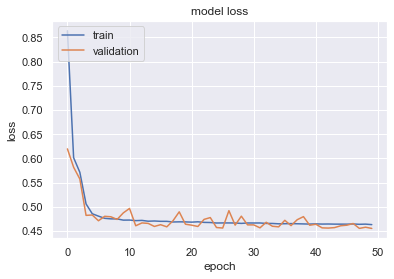

In [13]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

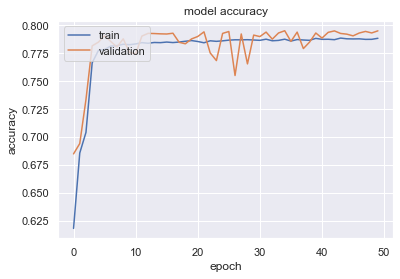

In [19]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Test Prediction

In [20]:
test=pd.read_csv("test.csv")
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [21]:
## Age
test=test.assign(Age_Group = test['Age'].apply(lambda x : 23 if (x>=20 and x<30)
                                               else (34 if (x>=30 and x<40)
                                                     else (45 if (x>=40 and x<50)
                                                           else (56 if (x>=50 and x<60)
                                                                 else (67 if (x>=60 and x<70)
                                                                       else (78 if (x>=70 and x<80)
                                                                             else 80)))))))
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Age_Group
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No,23
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No,45
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No,34
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No,23
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No,23


In [22]:
test['Credit_Product']=test['Credit_Product'].fillna('0')

## Vintage
test=test.assign(Vintage_Group = test['Vintage'].apply(lambda x : 2 if (x>=0 and x<24)
                                               else (24 if (x>=24 and x<48)
                                                     else (46 if (x>=48 and x<72)
                                                           else (68 if (x>=72 and x<96)
                                                                 else (81 if (x>=96 and x<120)
                                                                       else 99))))))

test=test.drop(['Age','Vintage'], axis=1)
test['Gender'].replace({'Male':1, 'Female':0}, inplace=True)
test['Occupation'].replace({'Entrepreneur':0, 'Other':1, 'Salaried':2, 'Self_Employed':3}, inplace=True)
test['Channel_Code'].replace({'X1':0, 'X2':1, 'X3':2, 'X4':3}, inplace=True)
test['Is_Active'].replace({'Yes':1, 'No':0}, inplace=True)
test['Credit_Product'].replace({'Yes':0,'No':1,'0':2},inplace=True)
test.head()

,ID,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Avg_Account_Balance,Is_Active,Age_Group,Vintage_Group
0,VBENBARO,1,RG254,1,0,0,742366,0,23,24
1,CCMEWNKY,1,RG268,1,1,2,925537,0,45,46
2,VK3KGA9M,1,RG270,2,0,1,215949,0,34,2
3,TT8RPZVC,1,RG272,1,0,1,868070,0,23,24
4,SHQZEYTZ,0,RG270,1,0,1,657087,0,23,2


In [23]:
test_tst=test.drop(['ID','Region_Code'], axis=1)


#scaling Avg_Account_Balance with Standard-Deviation
from sklearn.preprocessing import MinMaxScaler
ss = MinMaxScaler()
test_tst['Avg_Account_Balance'] = ss.fit_transform(test_tst[['Avg_Account_Balance']])

In [30]:
predicted_val=model.predict(test_tst)
pred=[]
for i in predicted_val[:,0]:
    if i > 0.5:
        pred.append(1)
    else:
        pred.append(0)

In [31]:
Final=pd.DataFrame({'ID':test['ID'],'Is_Lead':pred})
Final.to_csv('NN.csv',index=False)